# RUN

In [ ]:
!git clone https://github.com/geyuying/PF-AFN.git

Cloning into 'PF-AFN'...
remote: Enumerating objects: 383, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (140/140), done.
remote: Total 383 (delta 74), reused 118 (delta 35), pack-reused 197
Receiving objects: 100% (383/383), 4.49 MiB | 5.05 MiB/s, done.
Resolving deltas: 100% (129/129), done.


In [ ]:
!pip install torch==1.1.0 torchvision==0.3.0

     |████████████████████████████████| 676.9MB 27kB/s 
     |████████████████████████████████| 2.6MB 45.1MB/s 
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.1.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


In [ ]:
# !pip install onnx==1.3.0

In [ ]:
# !pip install torch==1.0.0
!pip install torch==1.6.0
# !pip install torch==1.3.0

     |████████████████████████████████| 748.8MB 23kB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.6.0 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102


In [ ]:
%cd PF-AFN
%cd PF-AFN_test

/content/PF-AFN
/content/PF-AFN/PF-AFN_test


In [ ]:
!pip install gdown

In [ ]:
!gdown --id 1_a0AiN8Y_d_9TNDhHIcRlERz3zptyYWV -O checkpoints.zip
# !gdown --id 1Pz2kA65N4Ih9w6NFYBDmdtVdB-nrrdc3 -O checkpoints_github.zip

Downloading...
From: https://drive.google.com/uc?id=1_a0AiN8Y_d_9TNDhHIcRlERz3zptyYWV
To: /content/PF-AFN/PF-AFN_test/checkpoints.zip
271MB [00:03, 82.5MB/s]


In [ ]:
!rm -rf checkpoints
!unzip checkpoints.zip

Archive:  checkpoints.zip
   creating: checkpoints/
  inflating: checkpoints/.DS_Store   
  inflating: __MACOSX/checkpoints/._.DS_Store  
   creating: checkpoints/PFAFN/
  inflating: checkpoints/PFAFN/.DS_Store  
  inflating: __MACOSX/checkpoints/PFAFN/._.DS_Store  
  inflating: checkpoints/PFAFN/gen_model_final.pth  
  inflating: checkpoints/PFAFN/warp_model_final.pth  


In [ ]:
# !cp checkpoints_github/PFAFN_gen_epoch_101.pth checkpoints/PFAFN/gen_model_final.pth
# !cp checkpoints_github/PFAFN_warp_epoch_101.pth checkpoints/PFAFN/warp_model_final.pth  

In [ ]:
!sh test.sh

Traceback (most recent call last):
  File "test.py", line 5, in <module>
    from models.afwm import AFWM
  File "/content/PF-AFN/PF-AFN_test/models/afwm.py", line 4, in <module>
    from .correlation import correlation
  File "/content/PF-AFN/PF-AFN_test/models/correlation/correlation.py", line 274, in <module>
    @cupy.util.memoize(for_each_device=True)
  File "/usr/local/lib/python3.7/dist-packages/cupy/__init__.py", line 875, in __getattr__
    f"module 'cupy' has no attribute {name!r}")
AttributeError: module 'cupy' has no attribute 'util'


# Pytorch-Correlation-extension

In [ ]:
!cp -r /usr/local/cuda-10.1/include/* /usr/include/

In [ ]:
!pip install git+https://github.com/tommy19970714/Pytorch-Correlation-extension.git@support-operator

  Cloning https://github.com/tommy19970714/Pytorch-Correlation-extension.git (to revision support-operator) to /tmp/pip-req-build-txwwivtf
  Running command git clone -q https://github.com/tommy19970714/Pytorch-Correlation-extension.git /tmp/pip-req-build-txwwivtf
  Running command git checkout -b support-operator --track origin/support-operator
  Switched to a new branch 'support-operator'
  Branch 'support-operator' set up to track remote branch 'support-operator' from 'origin'.
  Created wheel for spatial-correlation-sampler: filename=spatial_correlation_sampler-0.3.0-cp37-cp37m-linux_x86_64.whl size=2616518 sha256=9f35cfb9832ca2360764b24fa168016855485a5aa83d23ac281bd1b1b7ac8cc4
  Stored in directory: /tmp/pip-ephem-wheel-cache-i8e4tzxo/wheels/84/c1/c0/397e3ede95a8df8bf8ff91328fa257d0013eb28d69337c0441
Successfully built spatial-correlation-sampler


In [ ]:
!pip install spatial-correlation-sampler

  ERROR: Failed building wheel for spatial-correlation-sampler
  Running setup.py clean for spatial-correlation-sampler
Failed to build spatial-correlation-sampler
    Running setup.py install for spatial-correlation-sampler ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-jx7q29kw/spatial-correlation-sampler/setup.py'"'"'; __file__='"'"'/tmp/pip-install-jx7q29kw/spatial-correlation-sampler/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-6m0bohjh/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


# Grid_sample

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class GridSample(torch.autograd.Function):
    @staticmethod
    def symbolic(g, x, grid):
        return g.op('GridSample', x, grid)

    @staticmethod
    def forward(self, x, grid):
        return F.grid_sample(x, grid, 'bilinear', 'border')
        # F.grid_sample(x, grid, 'bilinear', 'zeros')

In [ ]:
class GridSampleModel(nn.Module):
    def __init__(self):
        super(GridSampleModel, self).__init__()
        self.grid_sample = GridSample()

    def forward(self, x, grid):
        return self.grid_sample.apply(x, grid)

In [ ]:
from torch.autograd import Variable
import numpy as np
model = GridSampleModel()
inp = Variable(torch.randn([5, 3, 6, 9]))
grid = torch.Tensor(np.random.uniform(low=-2, high=2, size=[5, 6, 9, 2]))
model.eval()
model(inp, grid)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


tensor([[[[-3.8512e-01,  7.1817e-02, -4.6175e-01, -7.2922e-01,  1.4785e-01,
           -5.6273e-01, -5.0839e-01, -7.9992e-01, -7.2922e-01],
          [-7.2922e-01, -7.2922e-01, -7.3690e-01, -7.2922e-01, -5.4745e-01,
           -2.3963e+00, -3.4604e-01,  1.3259e+00, -7.2922e-01],
          [ 2.1563e-01, -7.2922e-01,  7.1817e-02, -5.0839e-01, -6.8549e-01,
           -7.5536e-01, -5.0839e-01, -7.3214e-01, -3.5030e-01],
          [-5.5661e-01, -2.8230e-01,  1.5501e+00, -7.2922e-01, -1.3897e-01,
            5.4048e-01, -2.7888e-01, -9.2824e-02,  3.6527e-01],
          [-7.8821e-02, -5.0839e-01, -3.2358e-01, -1.8499e-01, -5.3043e-01,
           -1.5879e+00,  7.1817e-02, -6.8172e-01, -2.4848e-01],
          [ 2.0358e-01, -7.4064e-01, -2.6377e+00,  8.1480e-01, -1.8499e-01,
           -1.0288e+00, -5.0839e-01, -2.6799e-01,  2.3438e-01]],

         [[ 3.2769e-01, -2.6614e-01,  8.8620e-01,  3.8695e-01,  3.9650e-01,
            2.3132e-01, -1.0399e+00,  2.5636e-01,  3.8695e-01],
          [ 3.8695

# ONNX

models/afwm.pyを開いて、4行目のfrom .correlation import correlationをコメントアウトする

In [ ]:
import time
from options.test_options import TestOptions
from data.data_loader_test import CreateDataLoader
from models.networks import ResUnetGenerator, load_checkpoint
from models.afwm import *
import torch.nn as nn
import os
import numpy as np
import torch
import cv2
import torch.nn.functional as F

In [ ]:
!pip show spatial_correlation_sampler

In [ ]:
torch.ops.load_library("/usr/local/lib/python3.7/dist-packages/spatial_correlation_sampler_backend.cpython-37m-x86_64-linux-gnu.so")

@torch.jit.script
def correlate(input1, input2):
    kH, kW, patchH, patchW, padH, padW, dilationH, dilationW, dilation_patchH, dilation_patchW, dH, dW = 1, 1, 7, 7, 0, 0, 1, 1, 2, 2, 1, 1
    out_corr = torch.ops.my_ops.forward(input1, input2,
                                  kH, kW, patchH, patchW,
                                  padH, padW, dilationH, dilationW,
                                  dilation_patchH, dilation_patchW,
                                  dH, dW)
    b, ph, pw, h, w = out_corr.size()
    out_corr = out_corr.view(b, ph * pw, h, w)/input1.size(1)
    return F.leaky_relu_(out_corr, 0.1)

# class AFlowNet2(nn.Module):
#     def __init__(self, num_pyramid, fpn_dim=256):
#         super(AFlowNet2, self).__init__()
#         print("AFlowNet2 init 1")
#         self.netMain = []
#         self.netRefine = []
#         for i in range(num_pyramid):
#             netMain_layer = torch.nn.Sequential(
#                 torch.nn.Conv2d(in_channels=49, out_channels=128, kernel_size=3, stride=1, padding=1),
#                 torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
#                 torch.nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
#                 torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
#                 torch.nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
#                 torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
#                 torch.nn.Conv2d(in_channels=32, out_channels=2, kernel_size=3, stride=1, padding=1)
#             )
#             print("AFlowNet2 init 2")

#             netRefine_layer = torch.nn.Sequential(
#                 torch.nn.Conv2d(2 * fpn_dim, out_channels=128, kernel_size=3, stride=1, padding=1),
#                 torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
#                 torch.nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
#                 torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
#                 torch.nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
#                 torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
#                 torch.nn.Conv2d(in_channels=32, out_channels=2, kernel_size=3, stride=1, padding=1)
#             )
#             self.netMain.append(netMain_layer)
#             self.netRefine.append(netRefine_layer)
#             print("AFlowNet2 init 3")

#         self.netMain = nn.ModuleList(self.netMain)
#         self.netRefine = nn.ModuleList(self.netRefine)
#         # self.grid_sample = GridSampleModel()
#         print("AFlowNet2 init 3")


#     def forward(self, x, x_warps, x_conds, warp_feature=True):
#         last_flow = None
#         print("AFlowNet2 forward 1")

#         for i in range(len(x_warps)):
#           x_warp = x_warps[len(x_warps) - 1 - i]
#           x_cond = x_conds[len(x_warps) - 1 - i]
#           print("AFlowNet2 forward 2")

#           if last_flow is not None and warp_feature:
#               # x_warp_after = F.grid_sample(x_warp, last_flow.detach().permute(0, 2, 3, 1),
#               #      mode='bilinear', padding_mode='border')
#               x_warp_after = F.grid_sample(x_warp, last_flow.detach().permute(0, 2, 3, 1),
#                    mode='bilinear', padding_mode='border')
#           else:
#               x_warp_after = x_warp

#           # tenCorrelation = F.leaky_relu(input=correlation.FunctionCorrelation(tenFirst=x_warp_after, tenSecond=x_cond, intStride=1), negative_slope=0.1, inplace=False)
#           tenCorrelation = correlate(x_warp_after, x_cond)
#           flow = self.netMain[i](tenCorrelation)
#           flow = apply_offset(flow)
#           print("AFlowNet2 forward 3")

#           if last_flow is not None:
#               flow = F.grid_sample(last_flow, flow, mode='bilinear', padding_mode='border')
#               # flow = self.grid_sample(last_flow, flow)
#           else:
#               flow = flow.permute(0, 3, 1, 2)

#           last_flow = flow
#           print("AFlowNet2 forward 4")
#           x_warp = F.grid_sample(x_warp, flow.permute(0, 2, 3, 1),mode='bilinear', padding_mode='border')
#           # x_warp = self.grid_sample(x_warp, flow.permute(0, 2, 3, 1))
#           concat = torch.cat([x_warp,x_cond],1)
#           flow = self.netRefine[i](concat)
#           flow = apply_offset(flow)
#           flow = F.grid_sample(last_flow, flow, mode='bilinear', padding_mode='border')
#           # flow = self.grid_sample(last_flow, flow)

#           last_flow = F.interpolate(flow, scale_factor=2, mode='bilinear')
#           print("AFlowNet2 forward 5")

#         x_warp = F.grid_sample(x, last_flow.permute(0, 2, 3, 1),
#                      mode='bilinear', padding_mode='border')
#         # x_warp = self.grid_sample(x, last_flow.permute(0, 2, 3, 1))
#         return x_warp, last_flow,

OSError: ignored

In [ ]:
class AFlowNet2(nn.Module):
    def __init__(self, num_pyramid, fpn_dim=256):
        super(AFlowNet2, self).__init__()
        self.netMain = []
        self.netRefine = []
        for i in range(num_pyramid):
            netMain_layer = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=49, out_channels=128, kernel_size=3, stride=1, padding=1),
                torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
                torch.nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
                torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
                torch.nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
                torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
                torch.nn.Conv2d(in_channels=32, out_channels=2, kernel_size=3, stride=1, padding=1)
            )

            netRefine_layer = torch.nn.Sequential(
                torch.nn.Conv2d(2 * fpn_dim, out_channels=128, kernel_size=3, stride=1, padding=1),
                torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
                torch.nn.Conv2d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1),
                torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
                torch.nn.Conv2d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1),
                torch.nn.LeakyReLU(inplace=False, negative_slope=0.1),
                torch.nn.Conv2d(in_channels=32, out_channels=2, kernel_size=3, stride=1, padding=1)
            )
            self.netMain.append(netMain_layer)
            self.netRefine.append(netRefine_layer)

        self.netMain = nn.ModuleList(self.netMain)
        self.netRefine = nn.ModuleList(self.netRefine)


    def forward(self, x, x_warps, x_conds, warp_feature=True):
        last_flow = None

        for i in range(len(x_warps)):
          x_warp = x_warps[len(x_warps) - 1 - i]
          x_cond = x_conds[len(x_warps) - 1 - i]

          if last_flow is not None and warp_feature:
              x_warp_after = F.grid_sample(x_warp, last_flow.detach().permute(0, 2, 3, 1),
                   mode='bilinear', padding_mode='border')
          else:
              x_warp_after = x_warp

          tenCorrelation = F.leaky_relu(input=correlation.FunctionCorrelation(tenFirst=x_warp_after, tenSecond=x_cond, intStride=1), negative_slope=0.1, inplace=False)
          # tenCorrelation = correlate(x_warp_after, x_cond)
          flow = self.netMain[i](tenCorrelation)
          flow = apply_offset(flow)

          if last_flow is not None:
              flow = F.grid_sample(last_flow, flow, mode='bilinear', padding_mode='border')
          else:
              flow = flow.permute(0, 3, 1, 2)

          last_flow = flow
          x_warp = F.grid_sample(x_warp, flow.permute(0, 2, 3, 1),mode='bilinear', padding_mode='border')
          concat = torch.cat([x_warp,x_cond],1)
          flow = self.netRefine[i](concat)
          flow = apply_offset(flow)
          flow = F.grid_sample(last_flow, flow, mode='bilinear', padding_mode='border')

          last_flow = F.interpolate(flow, scale_factor=2, mode='bilinear')

        x_warp = F.grid_sample(x, last_flow.permute(0, 2, 3, 1),
                     mode='bilinear', padding_mode='border')
        return x_warp, last_flow,

In [ ]:
class AFWM2(nn.Module):
    def __init__(self, opt, input_nc):
        super(AFWM2, self).__init__()
        num_filters = [64,128,256,256,256]
        self.image_features = FeatureEncoder(3, num_filters) 
        self.cond_features = FeatureEncoder(input_nc, num_filters)
        self.image_FPN = RefinePyramid(num_filters)
        self.cond_FPN = RefinePyramid(num_filters)
        self.aflow_net = AFlowNet2(len(num_filters))

    def forward(self, cond_input, image_input):
        print("AFWM2 forward 1")
        cond_pyramids = self.cond_FPN(self.cond_features(cond_input)) # maybe use nn.Sequential
        print("AFWM2 forward 2")
        image_pyramids = self.image_FPN(self.image_features(image_input))
        print("AFWM2 forward 3")

        x_warp, last_flow  = self.aflow_net(image_input, image_pyramids, cond_pyramids)
        print("AFWM2 forward 4")

        return x_warp, last_flow

In [ ]:
class MyTestOptions(TestOptions):
  def parse(self, save=True):
    if not self.initialized:
      self.initialize()
    args=["--name", "demo", "--resize_or_crop", "None", "--batchSize", "1" ,"--gpu_ids", "0"]
    self.opt = self.parser.parse_args(args=args)
    self.opt.isTrain = self.isTrain   # train or test

    str_ids = self.opt.gpu_ids.split(',')
    self.opt.gpu_ids = []
    for str_id in str_ids:
      id = int(str_id)
      if id >= 0:
        self.opt.gpu_ids.append(id)

    if len(self.opt.gpu_ids) > 0:
      torch.cuda.set_device(self.opt.gpu_ids[0])

    args = vars(self.opt)

    print('------------ Options -------------')
    for k, v in sorted(args.items()):
        print('%s: %s' % (str(k), str(v)))
    print('-------------- End ----------------')

    return self.opt

In [ ]:
opt = MyTestOptions().parse()

------------ Options -------------
batchSize: 1
data_type: 32
dataroot: dataset/
display_winsize: 512
fineSize: 512
gen_checkpoint: checkpoints/PFAFN/gen_model_final.pth
gpu_ids: [0]
input_nc: 3
isTrain: False
loadSize: 512
max_dataset_size: inf
nThreads: 1
name: demo
no_flip: False
norm: instance
output_nc: 3
phase: test
resize_or_crop: None
serial_batches: False
tf_log: False
use_dropout: False
verbose: False
warp_checkpoint: checkpoints/PFAFN/warp_model_final.pth
-------------- End ----------------


In [ ]:
warp_model = AFWM2(opt, 3)

In [ ]:
warp_model.eval()
warp_model.cuda()
# warp_model.cpu()
load_checkpoint(warp_model, opt.warp_checkpoint)

In [ ]:
gen_model = ResUnetGenerator(7, 4, 5, ngf=64, norm_layer=nn.BatchNorm2d)
print(gen_model)
gen_model.eval()
gen_model.cuda()
# gen_model.cpu()
load_checkpoint(gen_model, opt.gen_checkpoint)

ResUnetGenerator(
  (model): ResUnetSkipConnectionBlock(
    (model): Sequential(
      (0): Conv2d(7, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): ReLU(inplace)
      (2): ResidualBlock(
        (relu): ReLU(inplace)
        (block): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace)
          (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (3): ResidualBlock(
        (relu): ReLU(inplace)
        (block): Sequential(
          (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inpl

## Dataset

In [ ]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()

CustomDatasetDataLoader
dataset [AlignedDataset] was created


In [ ]:
for data in dataset:
  break

In [ ]:
real_image = data['image']
clothes = data['clothes']

edge = data['edge']
edge = torch.FloatTensor((edge.detach().numpy() > 0.5).astype(np.int))
clothes = clothes * edge

In [ ]:
# flow_out = warp_model(real_image.cpu(), clothes.cpu())
flow_out = warp_model(real_image.cuda(), clothes.cuda())

AFWM2 forward 1
AFWM2 forward 2
AFWM2 forward 3


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


AFWM2 forward 4


In [ ]:
warped_cloth, last_flow, = flow_out
# warped_edge = F.grid_sample(edge.cpu(), last_flow.permute(0, 2, 3, 1),
#                   mode='bilinear', padding_mode='zeros')
warped_edge = F.grid_sample(edge.cuda(), last_flow.permute(0, 2, 3, 1),
                  mode='bilinear', padding_mode='zeros')

In [ ]:
gen_inputs = torch.cat([real_image.cuda(), warped_cloth, warped_edge], 1)
# gen_inputs = torch.cat([real_image.cpu(), warped_cloth.cpu(), warped_edge.cpu()], 1)
gen_outputs = gen_model(gen_inputs)

In [ ]:
%env CUPY_DUMP_CUDA_SOURCE_ON_ERROR=1
%env CUPY_CACHE_SAVE_CUDA_SOURCE=1

env: CUPY_DUMP_CUDA_SOURCE_ON_ERROR=1
env: CUPY_CACHE_SAVE_CUDA_SOURCE=1


In [ ]:
# warp_model(real_image.cpu(), clothes.cpu())
warp_model(real_image.cuda(), clothes.cuda())

AFWM2 forward 1
AFWM2 forward 2
AFWM2 forward 3
AFWM2 forward 4


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:2539: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


(tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]],
 
          [[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]]], device='cuda:0',
        grad_fn=<GridSampler2DBackward>),
 tensor([[[[-1.5054, -1.5018, -1.4946,  ...,  1.5140,  1.5205,  1.5238],
           [-1.5046, -1.5010, -1.4937

In [ ]:
# torch.onnx.export(warp_model, (real_image.cpu(), clothes.cpu()), 'warp_model_mnet.onnx', opset_version=11)

In [ ]:
torch.onnx.export(
    warp_model,
    (real_image.cpu(), clothes.cpu()),
    "warp_model_mnet.onnx",
    input_names = ['input'],
    output_names = ['ouput'],
    # operator_export_type=torch.onnx.OperatorExportTypes.ONNX_ATEN_FALLBACK,
    opset_version=11,
    verbose=True
)
# torch.onnx.export(
#     gen_model,
#     gen_inputs,
#     "gen_model_mnet.onnx",
#     input_names = ['input'],
#     output_names = ['ouput'],
#     verbose=True
# )

AFWM2 forward 1
AFWM2 forward 2
AFWM2 forward 3


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


AFWM2 forward 4


RuntimeError: ignored

In [ ]:
!pip install -U coremltools

Requirement already up-to-date: coremltools in /usr/local/lib/python3.7/dist-packages (4.1)


In [ ]:
import coremltools as ct

In [ ]:
# example_input = (real_image.cpu(), clothes.cpu())
example_input = (real_image.cuda(), clothes.cuda())

In [ ]:
real_image.size()

torch.Size([1, 3, 256, 192])

In [ ]:
clothes.size()

torch.Size([1, 3, 256, 192])

In [ ]:
# example_input = (torch.rand(1, 3, 256, 192).cpu(), torch.rand(1, 3, 256, 192).cpu())
example_input = (torch.rand(1, 3, 256, 192).cuda(), torch.rand(1, 3, 256, 192).cuda())

In [ ]:
trace = torch.jit.trace(warp_model, example_input)

/content/PF-AFN/PF-AFN_test/models/correlation/correlation.py:282: TracerWarning: new_zeros is a legacy constructor and is not supported in the JIT.
  rbot0 = first.new_zeros([ first.shape[0], first.shape[2] + (6 * intStride), first.shape[3] + (6 * intStride), first.shape[1] ])
/content/PF-AFN/PF-AFN_test/models/correlation/correlation.py:283: TracerWarning: new_zeros is a legacy constructor and is not supported in the JIT.
  rbot1 = first.new_zeros([ first.shape[0], first.shape[2] + (6 * intStride), first.shape[3] + (6 * intStride), first.shape[1] ])
/content/PF-AFN/PF-AFN_test/models/correlation/correlation.py:292: TracerWarning: Converting a tensor to a Python float might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  output = first.new_zeros([ first.shape[0], 49, int(math.ceil(first.shape[2] / intStride)), int(math.ceil(first

AFWM2 forward 1
AFWM2 forward 2
AFWM2 forward 3


CompileException: ignored

In [ ]:
dummy_input = torch.rand(1, 3, 256, 192).cpu(), torch.rand(1, 3, 256, 192).cpu()
dummy_output = trace(torch.rand(1, 3, 256, 192).cpu(), torch.rand(1, 3, 256, 192).cpu())

In [ ]:
torch.jit.save(trace, 'warp_model.pt')

In [ ]:
from tempfile import TemporaryFile
with TemporaryFile() as temp:
  torch.onnx.export(model=model, args=dummy_input,  example_outputs=dummy_output, f=temp,  verbose=True, opset_version=11)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3982: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  "Default grid_sample and affine_grid behavior has changed "


RuntimeError: ignored

In [ ]:
# https://discuss.pytorch.org/t/cubin-cu-16-error-identifier-tensor-is-undefined/96226/3

In [ ]:
trace2 = torch.jit.trace(gen_model, gen_inputs)

/usr/local/lib/python3.7/dist-packages/torch/jit/__init__.py:444: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if a.grad is not None:


In [ ]:
torch.jit.save(trace2, 'gen_model.pt')

In [ ]:
trace2(gen_inputs)

tensor([[[[ 1.2969e+00,  1.3310e+00,  1.2954e+00,  ...,  1.3646e+00,
            1.4311e+00,  1.2938e+00],
          [ 1.3477e+00,  1.3145e+00,  1.3298e+00,  ...,  1.3777e+00,
            1.4381e+00,  1.3546e+00],
          [ 1.3271e+00,  1.3172e+00,  1.3319e+00,  ...,  1.3891e+00,
            1.3939e+00,  1.3287e+00],
          ...,
          [ 1.1830e+00,  1.2130e+00,  1.2205e+00,  ...,  1.3349e+00,
            1.3507e+00,  1.3071e+00],
          [ 1.2610e+00,  1.2012e+00,  1.2016e+00,  ...,  1.3311e+00,
            1.3558e+00,  1.2906e+00],
          [ 1.1488e+00,  1.2808e+00,  1.2225e+00,  ...,  1.3009e+00,
            1.3632e+00,  1.1800e+00]],

         [[ 1.2474e+00,  1.3373e+00,  1.2923e+00,  ...,  1.3967e+00,
            1.4395e+00,  1.3746e+00],
          [ 1.3321e+00,  1.3358e+00,  1.3496e+00,  ...,  1.3639e+00,
            1.4042e+00,  1.3561e+00],
          [ 1.3216e+00,  1.3236e+00,  1.3506e+00,  ...,  1.4078e+00,
            1.4372e+00,  1.3902e+00],
          ...,
     

In [ ]:
coreml_model = ct.convert(
    trace,
    inputs=[ct.TensorType(name="input1", shape=(1, 3, 256, 192)),
            ct.TensorType(name="intput2", shape=(1, 3, 256, 192))]
)

NameError: ignored

In [ ]:
gen_inputs.shape

torch.Size([1, 7, 256, 192])

In [ ]:
from coremltools.converters.mil import register_torch_op
from coremltools.converters.mil.frontend.torch.ops import _get_inputs
from coremltools.converters.mil.mil import Builder as mb
@register_torch_op
def type_as(context, node):
    inputs = _get_inputs(context, node)
    context.add(mb.cast(x=inputs[0], dtype='int32'), node.name)

In [ ]:
coreml_model = ct.convert(
    trace2,
    inputs=[ct.TensorType(name="input1", shape=(1, 7, 256, 192))]
)

Translating MIL ==> MLModel Ops: 100%|██████████| 615/615 [00:05<00:00, 113.97 ops/s]


In [ ]:
real_image = data['image']
clothes = data['clothes']

edge = data['edge']
edge = torch.FloatTensor((edge.detach().numpy() > 0.5).astype(np.int))
clothes = clothes * edge

flow_out = warp_model(real_image.cpu(), clothes.cpu())
warped_cloth, last_flow, = flow_out
warped_edge = F.grid_sample(edge.cpu(), last_flow.permute(0, 2, 3, 1),
                mode='bilinear', padding_mode='zeros')

gen_inputs = torch.cat([real_image.cpu(), warped_cloth, warped_edge], 1)
gen_outputs = gen_model(gen_inputs)
p_rendered, m_composite = torch.split(gen_outputs, [3, 1], 1)
p_rendered = torch.tanh(p_rendered)
m_composite = torch.sigmoid(m_composite)
m_composite = m_composite * warped_edge
p_tryon = warped_cloth * m_composite + p_rendered * (1 - m_composite)

AFWM2 forward 1
AFWM2 forward 2
AFWM2 forward 3


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3121: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


AFWM2 forward 4


In [ ]:
a = real_image.float().cpu()
b= clothes.cpu()
c = p_tryon
combine = torch.cat([a[0],b[0],c[0]], 2).squeeze()
cv_img=(combine.permute(1,2,0).detach().cpu().numpy()+1)/2
output=(cv_img*255).astype(np.uint8)

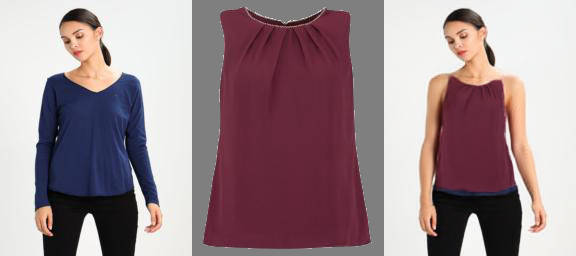

In [ ]:
from PIL import Image
Image.fromarray(output)